<a href="https://colab.research.google.com/github/shashank6341/Big-Data-Team-12/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pending Tasks


*   Outlier detection
*   



In [116]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn import tree
from sklearn.linear_model import LogisticRegression

from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [117]:
df = pd.read_csv('/content/drive/MyDrive/BDA Project/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [118]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [119]:
# Converting type of age column to int
df['age'] = df['age'].astype(int)

In [120]:
df['diabetes'].unique()

array([0, 1])

In [121]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Preprocessing Steps :

In [122]:
# Checking Null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [123]:
# Checking unique values for gender column
print("Gender unique values : ",df['gender'].unique())

Gender unique values :  ['Female' 'Male' 'Other']


In [124]:
# Removing the rows which has Others in gender column
df = df[df['gender']!='Other']
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [125]:
# Removing the data points with age = 0
df = df[df['age']!=0]

In [126]:
# Printing the unique values of all columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column {column}: {unique_values}")

Unique values in column gender: ['Female' 'Male']
Unique values in column age: [80 54 28 36 76 20 44 79 42 32 53 78 67 15 37 40  5 69 72  4 30 45 43 50
 41 26 34 73 77 66 29 60 38  3 57 74 19 46 21 59 27 13 56  2  7 11  6 55
  9 62 47 12 68 75 22 58 18 24 17 25 33 16 61 31  8 49 39 65 14 70 48 51
 71 64 63 52 10 35 23  1]
Unique values in column hypertension: [0 1]
Unique values in column heart_disease: [1 0]
Unique values in column smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Unique values in column bmi: [25.19 27.32 23.45 ... 59.42 44.39 60.52]
Unique values in column HbA1c_level: [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
Unique values in column blood_glucose_level: [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
Unique values in column diabetes: [0 1]


Check for Duplicates in the dataset and remove them.

In [127]:
# No. of duplicate rows in the dataset
print(f"No. of Duplicates in the Dataset : {df.duplicated().sum()}")

No. of Duplicates in the Dataset : 3877


In [128]:
df = df.drop_duplicates()
print(f"No. of Duplcate rows after deleting duplicate rows: {df.duplicated().sum()}")

No. of Duplcate rows after deleting duplicate rows: 0


In [129]:
# # Performing Label encoding to convert categorical data into numerical form
# label_encoder = LabelEncoder()


# # Fit and transform the smoking_history column
# df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# # Print the mapping of smoking_history categorical values to numeric values
# print("Smoking History - Categorical to Numeric Mapping:")
# for category, numeric_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
#     print(f"{category}: {numeric_value}")

# # Fit and transform the gender column
# df['gender'] = label_encoder.fit_transform(df['gender'])

# # Print the mapping of gender categorical values to numeric values
# print("\nGender - Categorical to Numeric Mapping:")
# for category, numeric_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
#     print(f"{category}: {numeric_value}")

df['smoking_history']=df['smoking_history'].map({'No Info':0,'never':1,'former':2,'current':3,'not current':4,'ever':5})
df['gender']=df['gender'].map({'Female':0,'Male':1})

df.head()

<ipython-input-129-8d5badf37b86>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history']=df['smoking_history'].map({'No Info':0,'never':1,'former':2,'current':3,'not current':4,'ever':5})


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,1,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,1,27.32,5.7,158,0
3,0,36,0,0,3,23.45,5.0,155,0
4,1,76,1,1,3,20.14,4.8,155,0


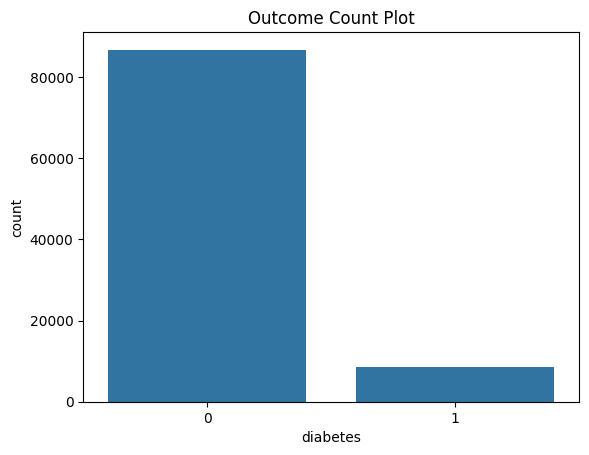

In [130]:
sns.countplot(x='diabetes', data=df)
plt.title('Outcome Count Plot')
plt.show()

The above graph cleary indicates that this dataset is biased. Using SMOTE (SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE) - FOR BALANCE dataset

In [131]:
# Performing SMOTE
y = df['diabetes']
X = df.drop(columns = ['diabetes'])
# Initial class distribution
print("Class distribution before SMOTE:")
print(y.value_counts())

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

# Class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y).value_counts())

Class distribution before SMOTE:
0    86712
1     8482
Name: diabetes, dtype: int64

Class distribution after SMOTE:
0    86712
1    86712
Name: diabetes, dtype: int64


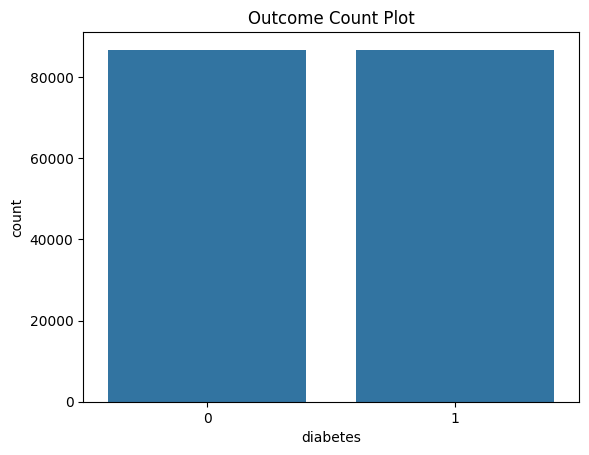

In [132]:
df = pd.concat([X, y], axis=1)

sns.countplot(x='diabetes', data=df)
plt.title('Outcome Count Plot')
plt.show()

It is possible that performing oversampling using SMOTE could generate noisy data.

In [133]:
# Checking null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [134]:
# Checking duplicate values and remove it
print(f"No. of Duplicates in the Dataset : {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"No. of Duplcate rows after deleting duplicate rows: {df.duplicated().sum()}")

No. of Duplicates in the Dataset : 1012
No. of Duplcate rows after deleting duplicate rows: 0


### Exploratory Data Analysis (EDA)

 Univariate analysis for gender column:


<ipython-input-135-9ccbdd3e40a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])


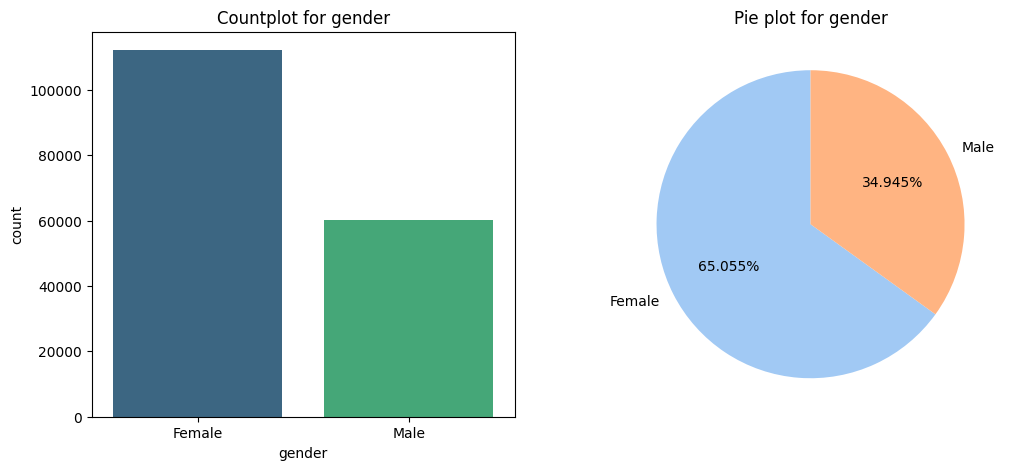

 Univariate analysis for smoking_history column:


<ipython-input-135-9ccbdd3e40a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])


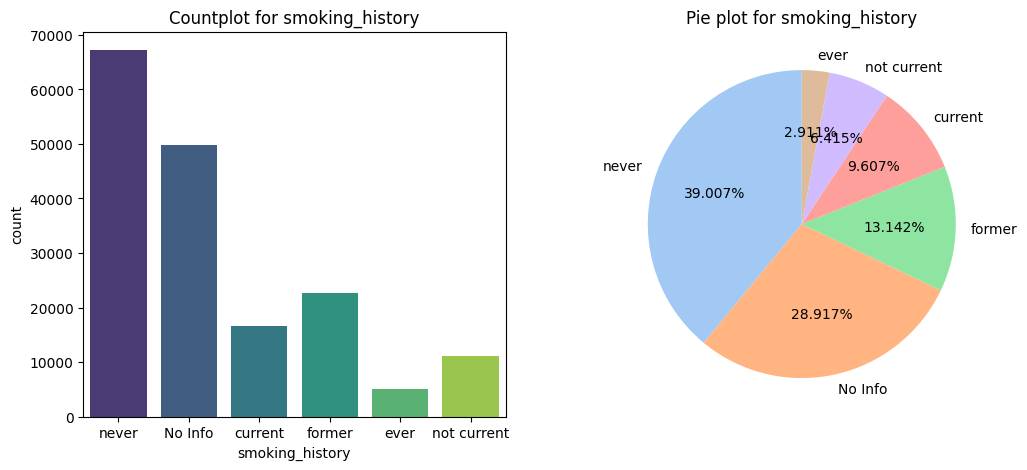

In [135]:
def univariate_analysis_cat(col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Countplot
    sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])
    ax[0].set_title(f'Countplot for {col}')

    # Pie plot
    data_counts = df[col].value_counts()
    ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.3f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax[1].set_title(f'Pie plot for {col}')

    plt.show()

df['smoking_history']=df['smoking_history'].map({0:'No Info',1:'never',2:'former',3:'current',4:'not current',5:'ever'})
df['gender']=df['gender'].map({0:'Female',1:'Male'})

for col in ['gender','smoking_history']:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_cat(col)

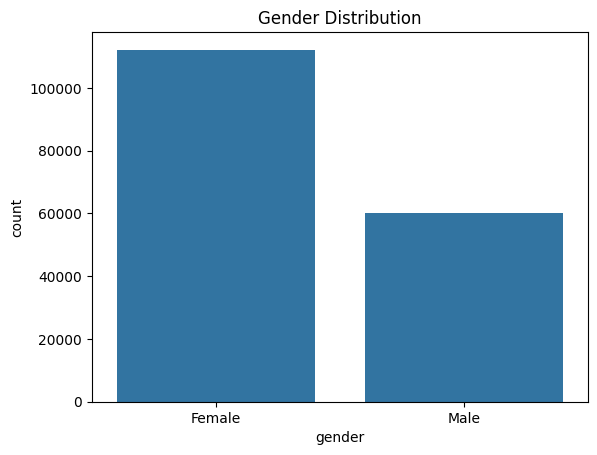

In [136]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

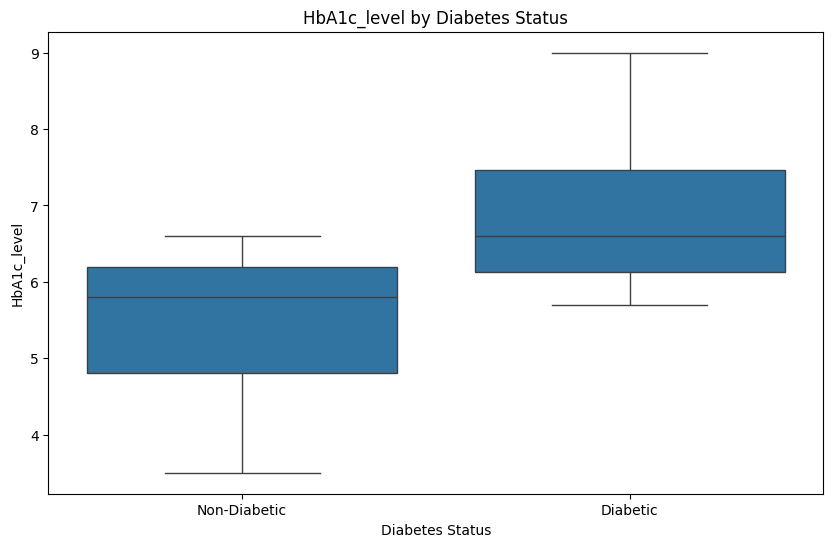

In [137]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c_level by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('HbA1c_level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])  # Adjust based on your 'diabetes' column encoding
plt.show()

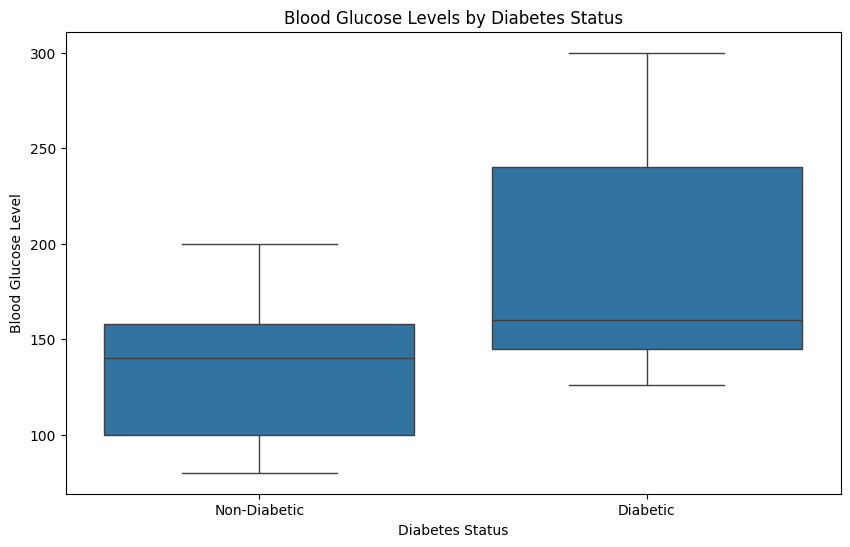

In [138]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Levels by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Blood Glucose Level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])  # Adjust based on your 'diabetes' column encoding
plt.show()

<ipython-input-139-ae0b3087fbd8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], bins=30)


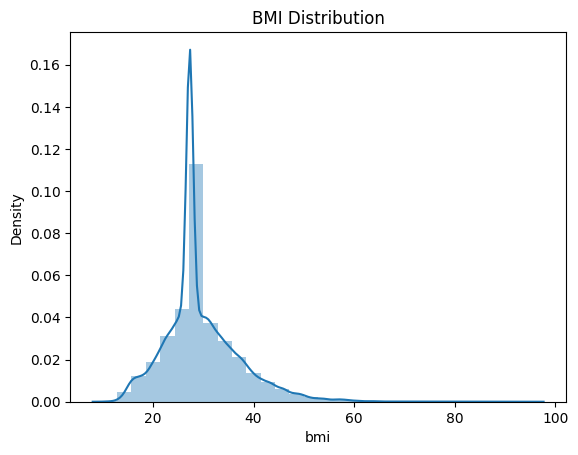

In [139]:
# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

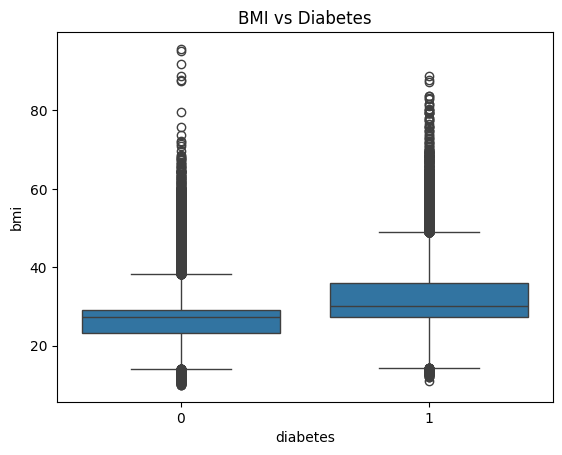

In [140]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

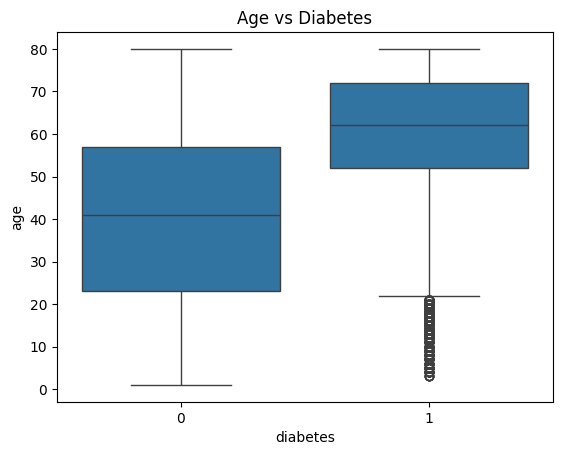

In [141]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

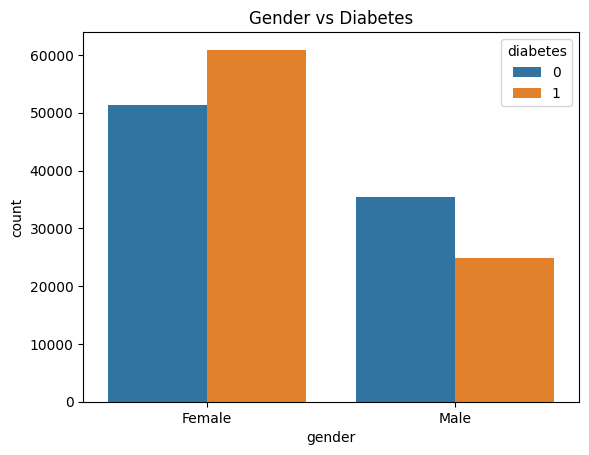

In [142]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

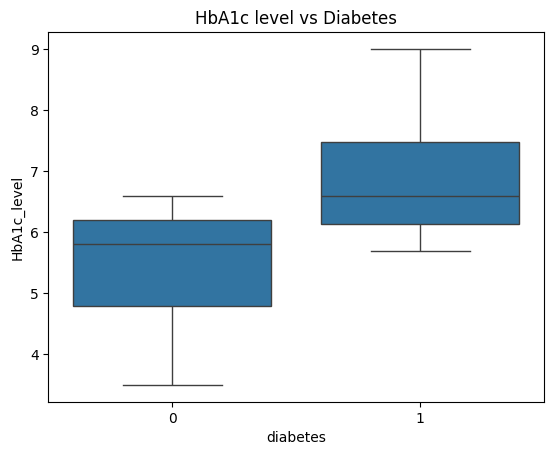

In [143]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

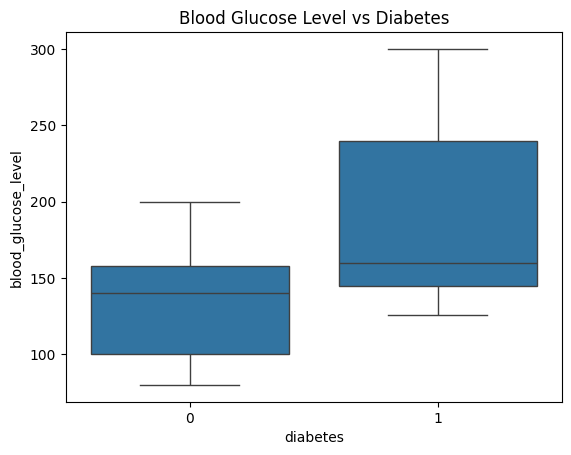

In [144]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

### Split the data into training, validation and test and processing Data to train the Models

In [145]:
# Pending - One Label Encoding, for Age and Gender to be performed.

df['smoking_history']=df['smoking_history'].map({'No Info':0,'never':1,'former':2,'current':3,'not current':4,'ever':5})
df['gender']=df['gender'].map({'Female':0,'Male':1})



In [146]:
# normalization


# Initialize the MinMaxScaler
# scaler = StandardScaler()
# df = scaler.fit_transform(df)
# df = DataFrame(df)

# df.head()

In [147]:
X = df.drop('diabetes', axis=1)  # Features
y = df['diabetes']  # Target variable

# First, split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the training set further into training and validation sets (75% training, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


#### Models

##### Logistic Regression

In [148]:

# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

y_test_pred = model.predict(X_test)

# # Calculate accuracy on the validation set
# accuracy = accuracy_score(y_val, y_val_pred)
# print("Validation Accuracy:", accuracy)

# # Calculate accuracy on the validation set
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print("Test Accuracy:", test_accuracy)

# Classification report for Test Dataset
test_classification_report = classification_report(y_test,y_test_pred)
print("Test Classification Report : ")
print(test_classification_report)

# Classification report for Validation Dataset
test_classification_report = classification_report(y_val,y_val_pred)
print("Validation Classification Report : ")
print(test_classification_report)

Test Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     17357
           1       0.88      0.88      0.88     17126

    accuracy                           0.88     34483
   macro avg       0.88      0.88      0.88     34483
weighted avg       0.88      0.88      0.88     34483

Validation Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     17261
           1       0.89      0.88      0.89     17222

    accuracy                           0.89     34483
   macro avg       0.89      0.89      0.89     34483
weighted avg       0.89      0.89      0.89     34483



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [149]:
# Classification report for Test Dataset
test_classification_report = classification_report(y_test,y_test_pred)
print("Test Classification Report : ")
print(test_classification_report)

# Classification report for Validation Dataset
test_classification_report = classification_report(y_val,y_val_pred)
print("Validation Classification Report : ")
print(test_classification_report)

Test Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     17357
           1       0.88      0.88      0.88     17126

    accuracy                           0.88     34483
   macro avg       0.88      0.88      0.88     34483
weighted avg       0.88      0.88      0.88     34483

Validation Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     17261
           1       0.89      0.88      0.89     17222

    accuracy                           0.89     34483
   macro avg       0.89      0.89      0.89     34483
weighted avg       0.89      0.89      0.89     34483



##### Decision Tree

In [153]:
# model = tree.DecisionTreeClassifier()

# # Train the model
# model.fit(X_train, y_train)

# fig = plt.figure(figsize=(20,15))
# tree.plot_tree(model);

# Initialize Decision Tree Classifier
decisionTree_classifier = DecisionTreeClassifier(random_state=42)

# Define hyperparameters and their values to tune
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# param_grid = {
#     'classifier__n_estimators': [50, 100, 200],
#     'classifier__max_depth': [None, 10, 20],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4]
# }

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decisionTree_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)
print("\n")

# Predict on the validation set using the best estimator
y_val_pred = best_estimator.predict(X_val)

# Calculate accuracy on the validation set
decisionTree_val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", decisionTree_val_accuracy)
print("\n")

# Predict on the test set using the best estimator
y_test_pred = best_estimator.predict(X_test)

# Calculate accuracy on the test set
decisionTree_test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", decisionTree_test_accuracy)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Estimator: DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, random_state=42)


Validation Accuracy: 0.9698112113215207


Test Accuracy: 0.9694632137575037
